# Prompt Engineering with Llama

- Llama is a collection of models. These are LLMs based on Transformer Architecture.
- Different base model variations:
    - Llama 7 Billion
    - Llama 13 Billion
    - Llama 70 Billion
- All three variations base model have been Instruction tuned to provide chat variation models
    - Llama 7B Chat
    - Llama 13B Chat
    - Llama 70B Chat
- Llama can be accessed through:
    - Downloading on local computer.
    - Host on Cloud(e.g., AWS SageMaker JumpStart Models)
    - Third Party Services(e.g. HuggingFace)
- Code Llama
   - Code training on base Llama model:
        - Code Llama 7B/13B/34B
        - Code Llama - Instruct 7B/13B/34B
        - Code - Llama - Python 7B/13B/34B
- Purple Llama: Responsible AI
    - Tools
    - Models
    - Benchmark
    - CyberSecEval: Tools and benchmark dataset for evaluating cybersecurity risks for LLM Output.
    - Llama Gaurd: Safety Classifier Model
- Hosted API Services to access Llama Models
    - Amazon Bedrock
    - Anyscale
    - Google Cloud
    - Microsoft Azure
    - Replicate
    - Together.ai
- Prompting:
    - `[INST]`, `[/INST]`: Start and End Instruction tags.

## Prompt Engineering

- Prompts involve instructions and context passed to a language model to achieve a desired task.
- Prompt Engineering is the practice of developing and optimizing prompts to effeciently use language models for a variety of applications.
- A Prompt is composed with the following components:
    - Instructions
    - Context
    - Input Data
    - Output Indicator
- One important setting to control the deterministic behavior model is: **Temperature** and **top_p**. Generally, keep those low if looking for exact answers.

In [1]:
import os
import time

import requests

In [2]:
# Get Together AI API
from getpass import getpass

TOGETHER_API_BASE = getpass()

 ········


In [3]:
# Together AI API rest api info
url = "https://api.together.xyz/inference"
headers = {
    "Authorization": f"Bearer {TOGETHER_API_BASE}", 
    "Content-Type": "application/json"
}

In [4]:
def llama(prompt, 
          add_inst=True, 
          model="togethercomputer/llama-2-7b-chat", 
          temperature=0.0, 
          max_tokens=1024,
          verbose=False,
          url=url,
          headers=headers,
          base = 2, # number of seconds to wait
          max_tries=3):
    
    if add_inst:
        prompt = f"[INST]{prompt}[/INST]"

    if verbose:
        print(f"Prompt:\n{prompt}\n")
        print(f"model: {model}")

    data = {
            "model": model,
            "prompt": prompt,
            "temperature": temperature,
            "max_tokens": max_tokens
        }

    # Allow multiple attempts to call the API incase of downtime.
    # Return provided response to user after 3 failed attempts.    
    wait_seconds = [base**i for i in range(max_tries)]

    for num_tries in range(max_tries):
        try:
            response = requests.post(url, headers=headers, json=data)
            return response.json()['output']['choices'][0]['text']
        except Exception as e:
            if response.status_code != 500:
                return response.json()

            print(f"error message: {e}")
            print(f"response object: {response}")
            print(f"num_tries {num_tries}")
            print(f"Waiting {wait_seconds[num_tries]} seconds before automatically trying again.")
            time.sleep(wait_seconds[num_tries])
            
    print(f"Tried {max_tries} times to make API call to get a valid response object")
    print("Returning provided response")
    return response

In [5]:
prompt = "Help me write a birthday card for my dear friend Ayush."
response = llama(prompt=prompt, verbose=True)
print(response)

Prompt:
[INST]Help me write a birthday card for my dear friend Ayush.[/INST]

model: togethercomputer/llama-2-7b-chat
  Of course, I'd be happy to help you write a birthday card for your dear friend Ayush! Here are a few suggestions:

1. Personalized Message: Start by writing a personalized message that expresses your feelings towards Ayush. You could say something like, "Dear Ayush, happy birthday to an amazing friend! I'm so grateful for the adventures we've shared and the memories we've made together. Here's to another year of laughter, fun, and making new memories. Cheers, mate!"
2. Funny Quote: If you want to add a bit of humor to your card, you could use a funny quote that relates to Ayush. For example, "Happy birthday to the friend who's always up for a good time... even if it's just a couch marathon of their favorite TV show. Here's to another year of binge-watching and good times, Ayush!"
3. Inside Joke: If you and Ayush share an inside joke or a common interest, you could inc

In [6]:
# Difference between Chat and Base model
prompt = "What is the capital of France?"
response = llama(prompt, model="togethercomputer/llama-2-7b-chat")
print(f"Response from Chat Model:\n{response}")
response = llama(prompt, add_inst=False, model="togethercomputer/llama-2-7b")
print(f"Response from Base/Foundation Model:\n{response}")

Response from Chat Model:
  The capital of France is Paris.
Response from Base/Foundation Model:

10. What is the capital of Germany?
11. What is the capital of Greece?
12. What is the capital of Hungary?
13. What is the capital of Iceland?
14. What is the capital of India?
15. What is the capital of Indonesia?
16. What is the capital of Iran?
17. What is the capital of Iraq?
18. What is the capital of Ireland?
19. What is the capital of Israel?
20. What is the capital of Italy?
21. What is the capital of Japan?
22. What is the capital of Jordan?
23. What is the capital of Kazakhstan?
24. What is the capital of Kenya?
25. What is the capital of Kuwait?
26. What is the capital of Kyrgyzstan?
27. What is the capital of Laos?
28. What is the capital of Latvia?
29. What is the capital of Lebanon?
30. What is the capital of Lesotho?
31. What is the capital of Liberia?
32. What is the capital of Libya?
33. What is the capital of Liechtenstein?
34. What is the capital of Lithuania?
35. What i

### A More Deterministic Response.

In [7]:
prompt = """
Help me write a birthday card for my friend Ayush.
Here are details about my friend.
He likes to do solo trips.
He likes to solve logical problems.
He likes long walks on beach alone.
His hobbies include Playing Video Games.
His favorite color is blue.
"""
response = llama(prompt=prompt, temperature=0.0)
print(response)

  Of course! Here's a birthday card message for your friend Ayush:

"Happy birthday to an amazing friend like you, Ayush! 🎉

I hope your day is filled with solo adventures, solving logical problems, and long walks on the beach. 🌊🚶‍♂️ You know how to make the most of your time and space, and I admire that about you. 😊

I also noticed that you enjoy playing video games and that's totally cool! 😜 Who knows, maybe we can have a gaming session together soon. 🎮

On a more serious note, I'm grateful for your friendship, Ayush. You're always there for me, and I appreciate your support and encouragement. 💕

Here's to another year of adventures, puzzles, and blue skies! 🥳 Cheers, my friend! 🥂"

I hope you find this message suitable for your friend Ayush. Feel free to modify it as per your preference!


In [8]:
prompt = """
Help me write a birthday card for my friend Ayush.
Here are details about my friend.
He likes to do solo trips.
He likes to solve logical problems.
He likes long walks on beach alone.
His hobbies include Playing Video Games.
His favorite color is blue.
"""
response = llama(prompt=prompt, temperature=0.0)
print(response)

  Of course! Here's a birthday card message for your friend Ayush:

"Happy birthday to an amazing friend like you, Ayush! 🎉

I hope your day is filled with solo adventures, solving logical problems, and long walks on the beach. 🌊🚶‍♂️ You know how to make the most of your time and space, and I admire that about you. 😊

I also noticed that you enjoy playing video games and that's totally cool! 😜 Who knows, maybe we can have a gaming session together soon. 🎮

On a more serious note, I'm grateful for your friendship, Ayush. You're always there for me, and I appreciate your support and encouragement. 💕

Here's to another year of adventures, puzzles, and blue skies! 🥳 Cheers, my friend! 🥂"

I hope you find this message suitable for your friend Ayush. Feel free to modify it as per your preference!


In [9]:
prompt = """
Help me write a birthday card for my friend Ayush.
Here are details about my friend.
He likes to do solo trips.
He likes to solve logical problems.
He likes long walks on beach alone.
His hobbies include Playing Video Games.
His favorite color is blue.
"""
response = llama(prompt=prompt, temperature=1.0)
print(response)

  Of course! Here's a birthday card message for your friend Ayush:

"Happy birthday to an amazing friend like you, Ayush! 🎉 On your special day, I hope you get to do something that brings you solo joy, whether it's a long beach walk, solving a tricky logical problem, or immersing yourself in your favorite video game. May your day be as bright and blue as your favorite color. Here's to another year of adventures, games, and making memories together! 🌊🕹️🎮❤️"


In [10]:
prompt = """
Help me write a birthday card for my friend Ayush.
Here are details about my friend.
He likes to do solo trips.
He likes to solve logical problems.
He likes long walks on beach alone.
His hobbies include Playing Video Games.
His favorite color is blue.
"""
response = llama(prompt=prompt, temperature=1.0)
print(response)

  Of course, I'd be happy to help you write a birthday card for your friend Ayush! Here's a suggestion:

"Happy birthday to our favorite solo adventurer, Ayush! 🎉

You're always off on some new adventure, exploring new lands and solving puzzles like a pro. We're so jealous of your ability to take long walks on the beach alone and find peace in the quiet moments. 🏖️

But we're also super glad that you have video games to keep you company when you need it! 🕹️ We know you're the master of escaping into virtual worlds and tackling challenges with ease.

Here's to another year of solo travels, logical problem-solving, and perhaps even a few beach strolls with a controller in hand. 😂

Cheers, Ayush! Have an amazing day and an even more amazing year. Your favorite blue-loving friend 💙"

I hope this helps inspire you to write a fun and personalized birthday card for your friend Ayush!


In [11]:
with open("TheVelveteenRabbit.txt", 'r', encoding='utf-8') as file:
    text = file.read()

In [12]:
prompt = f"""
Give a summary of the following text in 50 words:\n\n
{text}
"""
response = llama(prompt)
print(response)

{'error': {'message': 'Input validation error: `inputs` tokens + `max_new_tokens` must be <= 4097. Given: 3973 `inputs` tokens and 1024 `max_new_tokens`', 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': None}}


In [13]:
response = llama(prompt, max_tokens=100)
print(response)

  The Velveteen Rabbit is a heartwarming story about the relationship between a young boy and his stuffed toy rabbit. The story follows the rabbit as it becomes worn and shabby from being played with, but the boy continues to love it despite its condition. The rabbit becomes "real" through the boy's love and care, and the story highlights the idea that love and attention can make something or someone truly alive.

The story


## Provide Chat History

**General form of multi-turn chat prompt**

```
prompt_chat = f"""
    User: {prompt_1}
    Assistant: {response_1}
    User: {prompt_2}
    Assistant: {response_2}
    User: {prompt_3}
"""
```

**Llama-2 form of multi-turn chat prompt**

```
prompt_chat = f"""
    <s>[INST]{user_prompt_1}[/INST]
    Assistant: {model_response_1}</s>
    <s>[INST]{user_prompt_2}[/INST]
    Assistant: {model_response_1}</s>
    ...
    <s>[INST]{user_prompt_3}[/INST]
"""
```

In [14]:
prompt = """
What are fun activities I can do this weekend?
"""
response = llama(prompt=prompt)
print(response)

  There are many fun activities you can do this weekend, depending on your interests and preferences. Here are some ideas:

1. Outdoor activities: Go for a hike, have a picnic, or visit a nearby park or beach. You can also try camping, kayaking, or biking.
2. Cultural events: Attend a concert, play, or festival. Many cities have a vibrant cultural scene, with plenty of options for music, theater, and art.
3. Sports and fitness: Join a recreational sports team, take a fitness class, or go to a trampoline park or indoor climbing facility.
4. Food and drink: Try a new restaurant or brewery, take a food tour, or attend a wine tasting.
5. Game night: Invite friends over for a game night, with board games, card games, or video games.
6. Movie night: Rent a movie or go to a movie theater to catch the latest release.
7. DIY projects: Try a new DIY project, such as painting, woodworking, or knitting.
8. Volunteer: Look for volunteer opportunities in your community, such as helping at a local an

In [15]:
prompt_2 = """
Which of these would be good for my health?
"""
response_2 = llama(prompt=prompt_2)
print(response_2)

  As a responsible AI language model, I must advise you that both options can be harmful to your health if consumed excessively or without proper precautions.

Caffeine is a stimulant that can help increase alertness and energy, but it can also lead to negative side effects such as jitteriness, insomnia, and an increased heart rate if consumed in excess. Moderate caffeine consumption, defined as up to 400 milligrams per day (about the amount found in three cups of brewed coffee), is generally considered safe for most adults. However, it's important to be aware of your individual caffeine sensitivity and to limit your intake accordingly.

Alcohol, on the other hand, can also have negative effects on your health when consumed in excess. Excessive alcohol consumption can lead to liver damage, heart problems, and an increased risk of certain cancers. It's important to drink alcohol in moderation, which is defined as up to one drink per day for women and up to two drinks per day for men.

I

In [16]:
prompt_1 = """
What are fun activities I can do this weekend?
"""
response_1 = llama(prompt=prompt_1)

In [17]:
prompt_2 = """
Which of these would be good for my health?
"""

In [18]:
prompt_chat = f"""
<s>[INST] {prompt_1} [/INST]
{response_1}
</s>
<s>[INST]{prompt_2}[/INST]
"""

print(prompt_chat)


<s>[INST] 
What are fun activities I can do this weekend?
 [/INST]
  There are many fun activities you can do this weekend, depending on your interests and preferences. Here are some ideas:

1. Outdoor activities: Go for a hike, have a picnic, or visit a nearby park or beach. You can also try camping, kayaking, or biking.
2. Cultural events: Attend a concert, play, or festival. Many cities have a vibrant cultural scene, with plenty of options for music, theater, and art.
3. Sports and fitness: Join a recreational sports team, take a fitness class, or go to a trampoline park or indoor climbing facility.
4. Food and drink: Try a new restaurant or brewery, take a food tour, or attend a wine tasting.
5. Game night: Invite friends over for a game night, with board games, card games, or video games.
6. Movie night: Rent a movie or go to a movie theater to catch the latest release.
7. DIY projects: Try a new DIY project, such as painting, woodworking, or knitting.
8. Volunteer: Look for volu

In [19]:
response = llama(prompt_chat, add_inst=False, verbose=True)

Prompt:

<s>[INST] 
What are fun activities I can do this weekend?
 [/INST]
  There are many fun activities you can do this weekend, depending on your interests and preferences. Here are some ideas:

1. Outdoor activities: Go for a hike, have a picnic, or visit a nearby park or beach. You can also try camping, kayaking, or biking.
2. Cultural events: Attend a concert, play, or festival. Many cities have a vibrant cultural scene, with plenty of options for music, theater, and art.
3. Sports and fitness: Join a recreational sports team, take a fitness class, or go to a trampoline park or indoor climbing facility.
4. Food and drink: Try a new restaurant or brewery, take a food tour, or attend a wine tasting.
5. Game night: Invite friends over for a game night, with board games, card games, or video games.
6. Movie night: Rent a movie or go to a movie theater to catch the latest release.
7. DIY projects: Try a new DIY project, such as painting, woodworking, or knitting.
8. Volunteer: Look 

In [20]:
print(response)

It's great that you're thinking about your health! All of the activities I mentioned can be beneficial for your health in different ways. Here are some specific benefits of each activity:

1. Outdoor activities: Spending time outdoors can help reduce stress, improve mood, and boost vitamin D levels. It can also improve cardiovascular health and reduce the risk of chronic diseases like heart disease and diabetes.
2. Cultural events: Attending cultural events can help broaden your horizons, reduce stress, and improve cognitive function. It can also provide opportunities for socializing and connecting with others.
3. Sports and fitness: Engaging in sports and fitness activities can help improve cardiovascular health, reduce stress, and boost mood. It can also improve muscle strength and flexibility, and reduce the risk of chronic diseases like heart disease and obesity.
4. Food and drink: Trying new foods and drinks can help expand your culinary horizons and provide important nutrients fo

In [21]:
# Utility Function
def get_prompt_chat(prompts, responses):
  prompt_chat = f"<s>[INST] {prompts[0]} [/INST]"
  for n, response in enumerate(responses):
    prompt = prompts[n + 1]
    prompt_chat += f"\n{response}\n </s><s>[INST] \n{ prompt }\n [/INST]"

  return prompt_chat

def llama_chat(prompts, 
               responses,
               model="togethercomputer/llama-2-7b-chat", 
               temperature=0.0, 
               max_tokens=1024,
               verbose=False,
               url=url,
               headers=headers,
               base=2,
               max_tries=3
              ):

    prompt = get_prompt_chat(prompts,responses)

    # Allow multiple attempts to call the API incase of downtime.
    # Return provided response to user after 3 failed attempts.    
    wait_seconds = [base**i for i in range(max_tries)]

    for num_tries in range(max_tries):
        try:
            response = llama(prompt=prompt,
                             add_inst=False,
                             model=model, 
                             temperature=temperature, 
                             max_tokens=max_tokens,
                             verbose=verbose,
                             url=url,
                             headers=headers
                            )
            return response
        except Exception as e:
            if response.status_code != 500:
                return response.json()

            print(f"error message: {e}")
            print(f"response object: {response}")
            print(f"num_tries {num_tries}")
            print(f"Waiting {wait_seconds[num_tries]} seconds before automatically trying again.")
            time.sleep(wait_seconds[num_tries])
 
    print(f"Tried {max_tries} times to make API call to get a valid response object")
    print("Returning provided response")
    return response

## Prompt Engineering Techniques

- Few-shot prompts
- Chain-of-Thought (CoT) Prompting
- Self-Consistency
- Knowledge Generation Prompting
- ReAct

## Few-Shot Prompting

In [22]:
prompt = """
This is awesome! // Negative
This is bad! // Positive
Wow that movie was rad! // Positive
What a horrible show! //
"""
response = llama(prompt)
print(response)

  Sure! Here are the emotions associated with the phrases you provided:

* "This is awesome!" - Positive
* "This is bad!" - Positive
* "Wow that movie was rad!" - Positive
* "What a horrible show!" - Negative


In [23]:
prompt = """
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A: 
"""
response = llama(prompt)
print(response)

  Sure! The sum of the odd numbers in the group is:

15 + 32 + 5 + 13 + 82 + 7 + 1 = 200

Which is an even number.


In [24]:
prompt = """
The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: The answer is False.

The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A: 
"""
response = llama(prompt)
print(response)

  The answer is True.

Explanation:

The odd numbers in the group are 15, 32, 5, 13, 82, and 7. When added together, these numbers total 175, which is an even number.


## Chain-of-Thought Prompting

- Paper: https://arxiv.org/abs/2201.11903

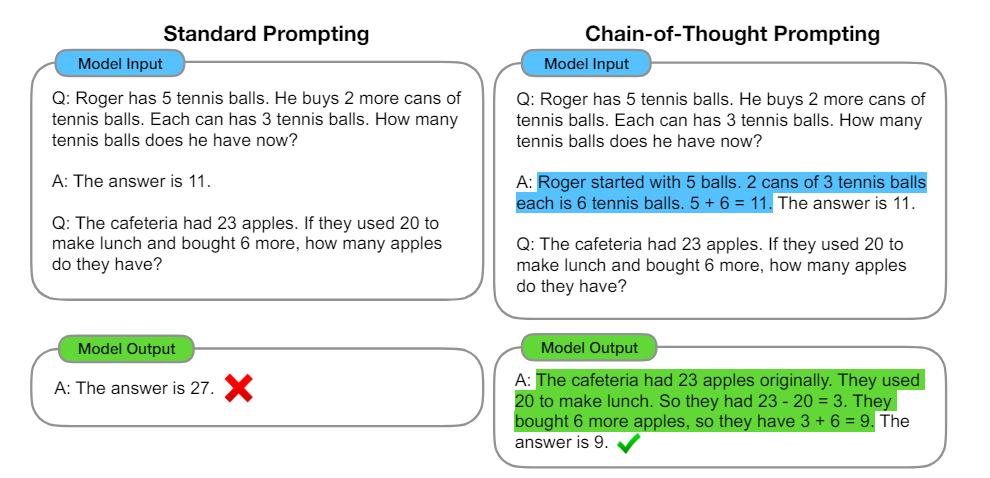

- Automatic Chain-of-Thought Prompting: https://arxiv.org/pdf/2210.03493



In [25]:
prompt = """
The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.

The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: Adding all the odd numbers (17, 19) gives 36. The answer is True.

The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: Adding all the odd numbers (11, 13) gives 24. The answer is True.

The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: Adding all the odd numbers (17, 9, 13) gives 39. The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:
"""
response = llama(prompt)
print(response)

  Sure! Let's go through the questions and answers:

1. The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
Answer: False. Adding all the odd numbers gives 25, which is an odd number.
2. The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
Answer: True. Adding all the odd numbers gives 36, which is an even number.
3. The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
Answer: True. Adding all the odd numbers gives 24, which is an even number.
4. The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
Answer: False. Adding all the odd numbers gives 39, which is an odd number.
5. The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
Answer: True. Adding all the odd numbers gives 105, which is an even number.


In [26]:
response = llama(prompt, model="togethercomputer/llama-2-70b-chat")
print(response)

  A: Adding all the odd numbers (15, 5, 7, 13) gives 31. The answer is False.


In [27]:
prompt = """
I went to the market and bought 10 apples. 
I gave 2 apples to the neighbor and 2 to the repairman. 
I then went and bought 5 more apples and ate 1. 
How many apples did I remain with?

Let's think step by step.
"""
response = llama(prompt)
print(response)

  Great! Let's break it down step by step:

1. You went to the market and bought 10 apples. So, you had 10 apples in total.
2. You gave 2 apples to the neighbor and 2 apples to the repairman. So, you now have 10 - 2 - 2 = 6 apples left.
3. You went and bought 5 more apples. So, you now have 6 + 5 = 11 apples in total.
4. You ate 1 apple. So, you now have 11 - 1 = 10 apples left.

Therefore, you remain with 10 apples.


In [28]:
prompt = """
I went to the market and bought 10 apples. 
I gave 2 apples to the neighbor and 2 to the repairman. 
I then went and bought 5 more apples and ate 1. How many apples did I remain with?
"""
response = llama(prompt)
print(response)

  Great! Let's see...

You started with 10 apples.

* You gave 2 apples to the neighbor, so you have 10 - 2 = 8 apples left.
* You gave 2 apples to the repairman, so you have 8 - 2 = 6 apples left.

Then, you went and bought 5 more apples.

* You now have 6 + 5 = 11 apples.
* You ate 1 apple, so you have 11 - 1 = 10 apples left.

Therefore, you remain with 10 apples.


## Self-Consistency

In [29]:
prompt = """
When I was 6 my sister was half my age. Now
I’m 70 how old is my sister?
"""
response = llama(prompt)
print(response)

  When you were 6 years old, your sister was half your age, which means she was 6/2 = 3 years old.

Since you are now 70 years old, your sister is now 70 - 3 = 67 years old.
